In [1]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-16/12/19
#Clasificar habla imaginada en EEG sin parpadeo con CNN de 1 capa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [5]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [7]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(132, 6, 512, 1)


In [8]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:
model = Sequential()
model.add(Conv2D(64, (3, 7), activation='relu', input_shape=(6, 512, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 4, 506, 64)        1408      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 253, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32384)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1036320   
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
Total params: 1,037,926
Trainable params: 1,037,926
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 0s 4ms/sample - loss: 2.5985 - acc: 0.1414 - val_loss: 2.7593 - val_acc: 0.2121
Epoch 2/20
99/99 [==============================] - 0s 504us/sample - loss: 2.3866 - acc: 0.1515 - val_loss: 2.4254 - val_acc: 0.1818
Epoch 3/20
99/99 [==============================] - 0s 524us/sample - loss: 2.1956 - acc: 0.1313 - val_loss: 1.9521 - val_acc: 0.0909
Epoch 4/20
99/99 [==============================] - 0s 494us/sample - loss: 1.6024 - acc: 0.2828 - val_loss: 2.0602 - val_acc: 0.0909
Epoch 5/20
99/99 [==============================] - 0s 507us/sample - loss: 1.6382 - acc: 0.3333 - val_loss: 1.9282 - val_acc: 0.1515
Epoch 6/20
99/99 [==============================] - 0s 504us/sample - loss: 1.6577 - acc: 0.3131 - val_loss: 1.9244 - val_acc: 0.1515
Epoch 7/20
99/99 [==============================] - 0s 505us/sample - loss: 1.5564 - acc: 0.3535 - val_loss: 1.9529 - val_acc: 0.1515
Epoch 8/20
99/99 [==

In [44]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 907us/sample - loss: 2.3754 - acc: 0.2121
Test loss: 2.3754485231457334
Test accuracy: 0.21212122


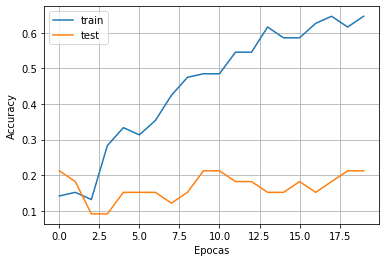

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

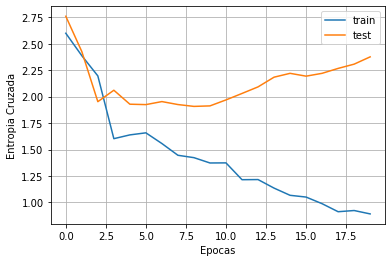

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()